<h1> Hardware AI </h1>

This notebook aims to document the data collection, pre-processing, and final building of the model.

We aim to classify the following actions
<li> Grenade </li>
<li> Spiderman </li>
<li> Doctor Strange </li>
<li> Captain Marvel </li>
<li> Thor </li>
<li> Wakanda </li>
<li> Shield </li>
<li> Reload </li>

As well as the game over action

<h1> Initial setup (software) </h1>

This section thanks the Ashraf for coming up with the sensors.

With the sensors, we will require two programs to collect the sensor data.

First, we will use Arduino IDE with the following code, and upload it to the arduino.

To use the Adafruit library, Sketch -> Include Library -> Manage ... -> Search for Adafruit MPU6050


<code>
#include <Adafruit_MPU6050.h>
#include <Adafruit_Sensor.h>
#include <Wire.h>

Adafruit_MPU6050 mpu;

String col1 = "Accel X";
String col2 = "Accel Y";
String col3 = "Accel Z";
String col4 = "Gyro X";
String col5 = "Gyro Y";
String col6 = "Gyro Z";
bool label = true;

void setup(void) {
 Serial.begin(115200);

 // Try to initialize!
 if (!mpu.begin()) {
  Serial.println("Failed to find MPU6050 chip");
  while (1) {
    delay(10);
  }
 }

 // set accelerometer range to +-8G
  // options: 2G (default), 4G, 8G (article), 16G
 mpu.setAccelerometerRange(MPU6050_RANGE_8_G);

 // set gyro range to +- 500 deg/s
  // options: 250 (default), 500 (article), 1000, 2000
 mpu.setGyroRange(MPU6050_RANGE_500_DEG);

  // set digital low-pass filter bandwidth to 21 Hz
  // options: 260Hz (Disables filter), 184, 94, 44, 21 (article), 10, 5 Hz
 mpu.setFilterBandwidth(MPU6050_BAND_21_HZ);

 delay(100);
}

void loop() {

  while (label) {
    delay(1000);
    Serial.print(col1);
    Serial.print(",");
    Serial.print(col2);
    Serial.print(",");
    Serial.print(col3);
    Serial.print(",");
    Serial.print(col4);
    Serial.print(",");
    Serial.print(col5);
    Serial.print(",");
    Serial.print(col6);
    Serial.println();
    label = false;
  }
 /* Get new sensor events with the readings */
 sensors_event_t a, g, temp;
 mpu.getEvent(&a, &g, &temp);


 /* Print out the values */
 Serial.print(a.acceleration.x);
 Serial.print(",");
 Serial.print(a.acceleration.y);
 Serial.print(",");
 Serial.print(a.acceleration.z);
 Serial.print(", ");
 Serial.print(g.gyro.x);
 Serial.print(",");
 Serial.print(g.gyro.y);
 Serial.print(",");
 Serial.print(g.gyro.z);
 Serial.println("");

 //About 33hz
 delay(30);
}
</code>

Once the code is uploaded, we will then run CoolTerm and start to record the serial data to text. 
This can be done using CoolTerm, and setting the baud rate to 115200 (as shown in the Arduino code)

The following screenshot shows the data collected


![Alt text](md-images/image.png)

<h1> Collection of data </h1>

Using the sensors, we will proceed to record each individual action 10 times, with no delay in between. 

<h2> Data pre-processing </h2>

To better understand the data collected, the columns represent the following

| Acceleration X | Acceleration Y | Acceleration Z | Gyro X | Gyro Y | Gyro Z |
| -------- | ------- | -------- | ------- | -------- | ------- |
|-1.05|10.97|1.07| 2.22|0.73|3.42|


Now, let's begin by importing the data files collected

In [1]:
import pandas as pd
import numpy as np

folderpath = './data'

grenade = pd.read_csv(f'{folderpath}/grenade.txt', header=None)
grenade.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

spiderman = pd.read_csv(f'{folderpath}/spiderman.txt', header=None)
spiderman.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

doctor_strange = pd.read_csv(f'{folderpath}/doctor_strange.txt', header=None)
doctor_strange.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

captain_marvel = pd.read_csv(f'{folderpath}/captain_marvel.txt', header=None)
captain_marvel.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

thor = pd.read_csv(f'{folderpath}/thor.txt', header=None)
thor.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

wakanda = pd.read_csv(f'{folderpath}/wakanda.txt', header=None)
wakanda.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

shield = pd.read_csv(f'{folderpath}/shield.txt', header=None)
shield.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

reload_df = pd.read_csv(f'{folderpath}/reload.txt', header=None)
reload_df.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

game_over_df = pd.read_csv(f'{folderpath}/game_over_surrender.txt', header=None)
game_over_df.columns = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']




<h2> Data visualisation </h2>

Now, let's see how the plots look like - note that the rows correspond to the sampling frames in increasing order



In [2]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graph(df, name):
    length = len(df)
    # plot the data
    plt.figure(figsize=(20, 5))
    plt.plot(range(length), df['Acc_X'], label='Acc_X')
    plt.plot(range(length), df['Acc_Y'], label='Acc_Y')
    plt.plot(range(length), df['Acc_Z'], label='Acc_Z')
    plt.plot(range(length), df['Gyr_X'], label='Gyr_X')
    plt.plot(range(length), df['Gyr_Y'], label='Gyr_Y')
    plt.plot(range(length), df['Gyr_Z'], label='Gyr_Z')
    # label the graph with the name of the gesture
    plt.title('Gesture: ' + name)
    plt.show()
    

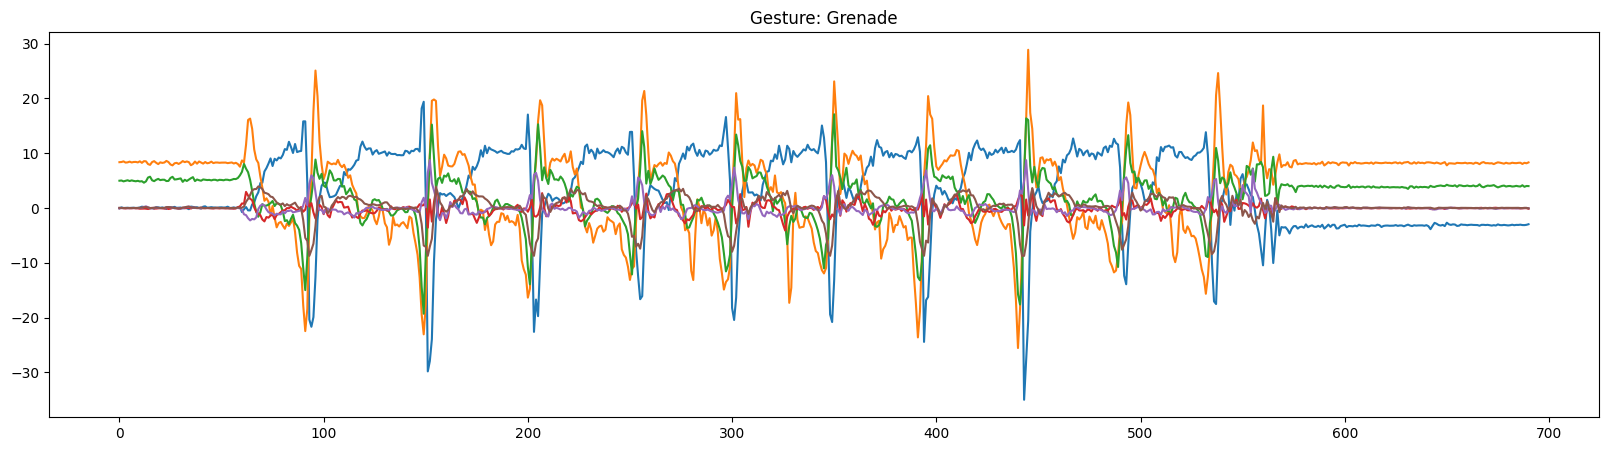

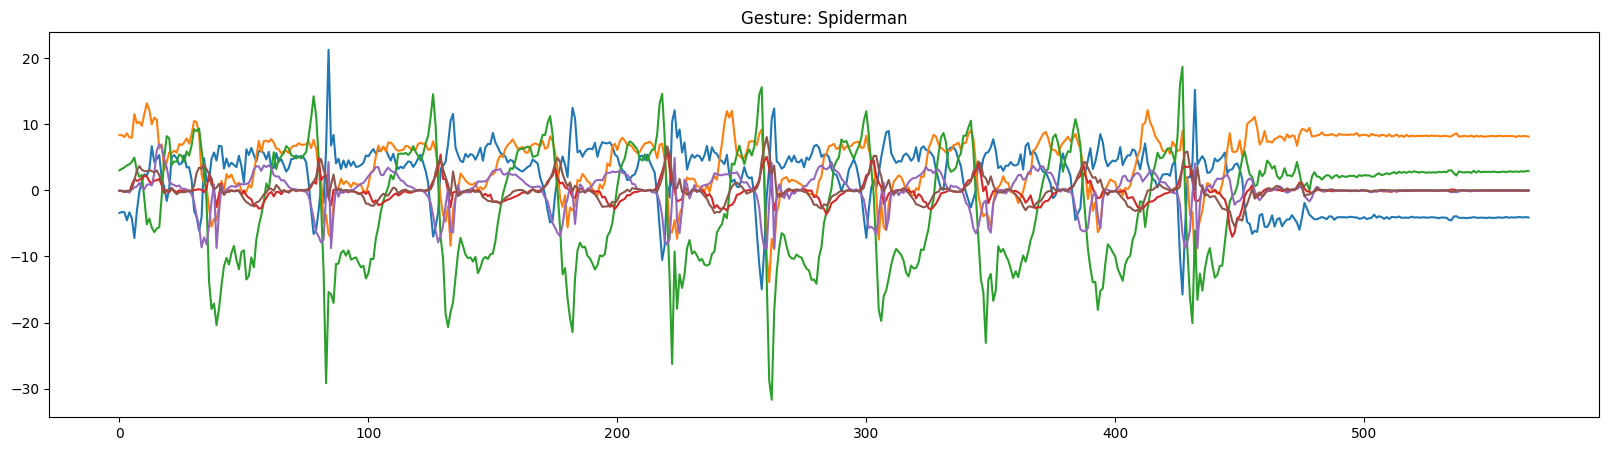

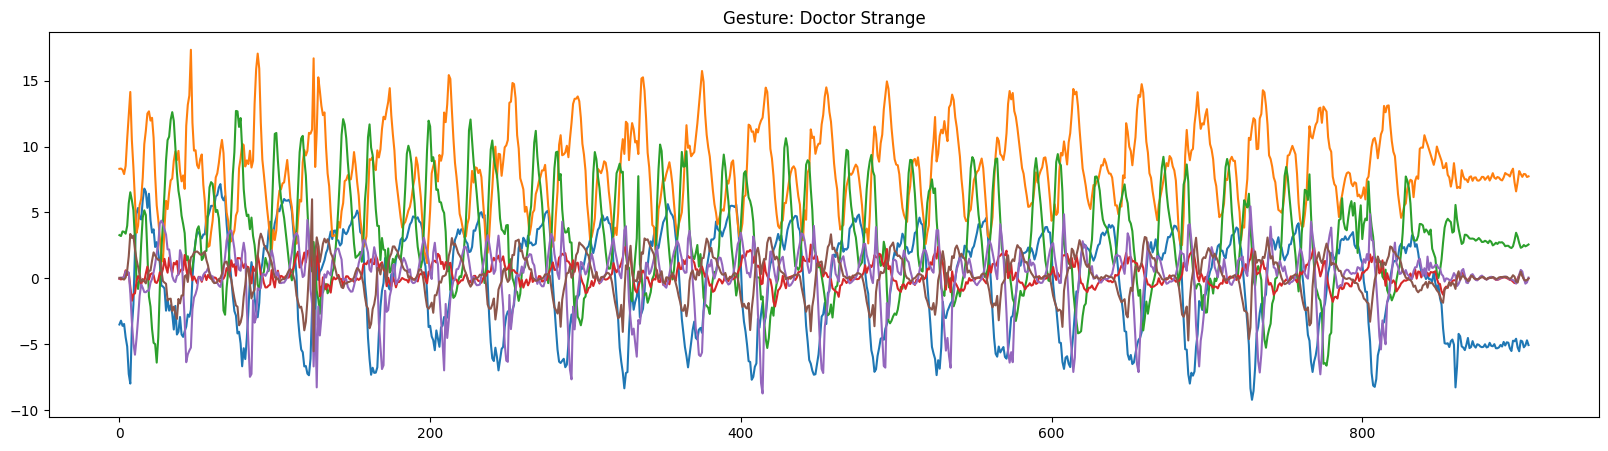

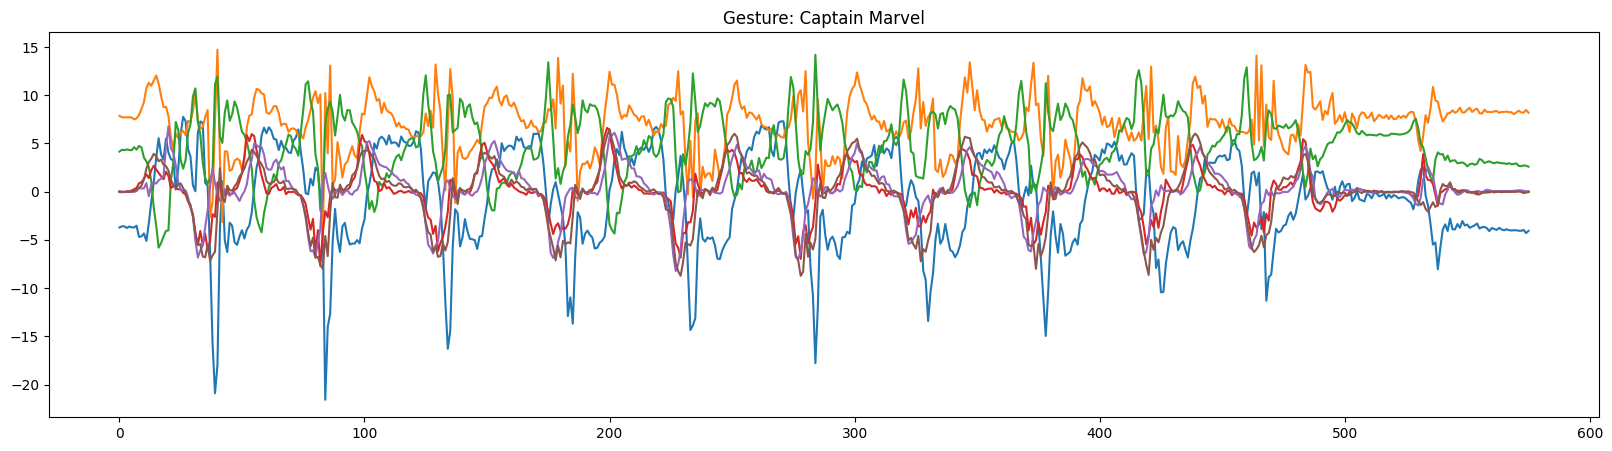

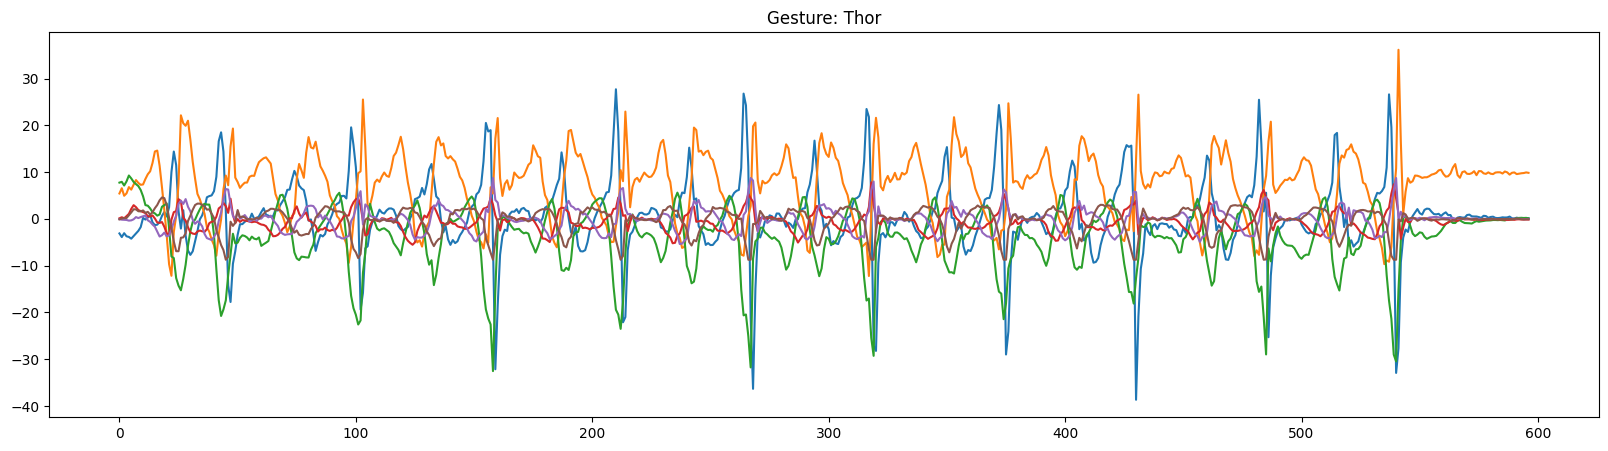

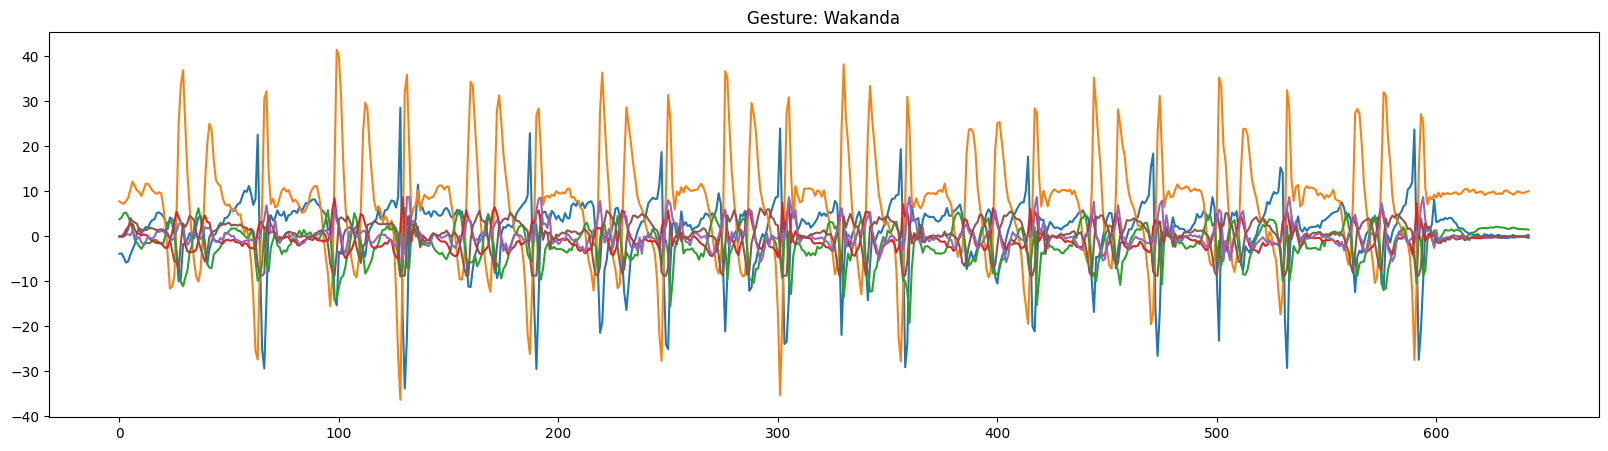

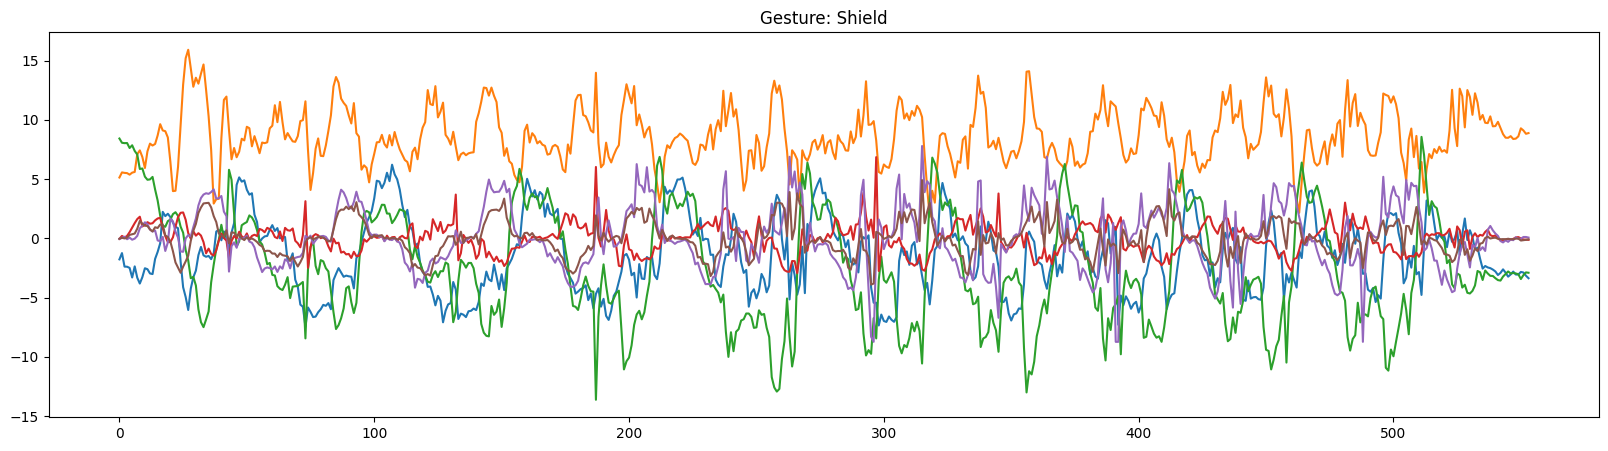

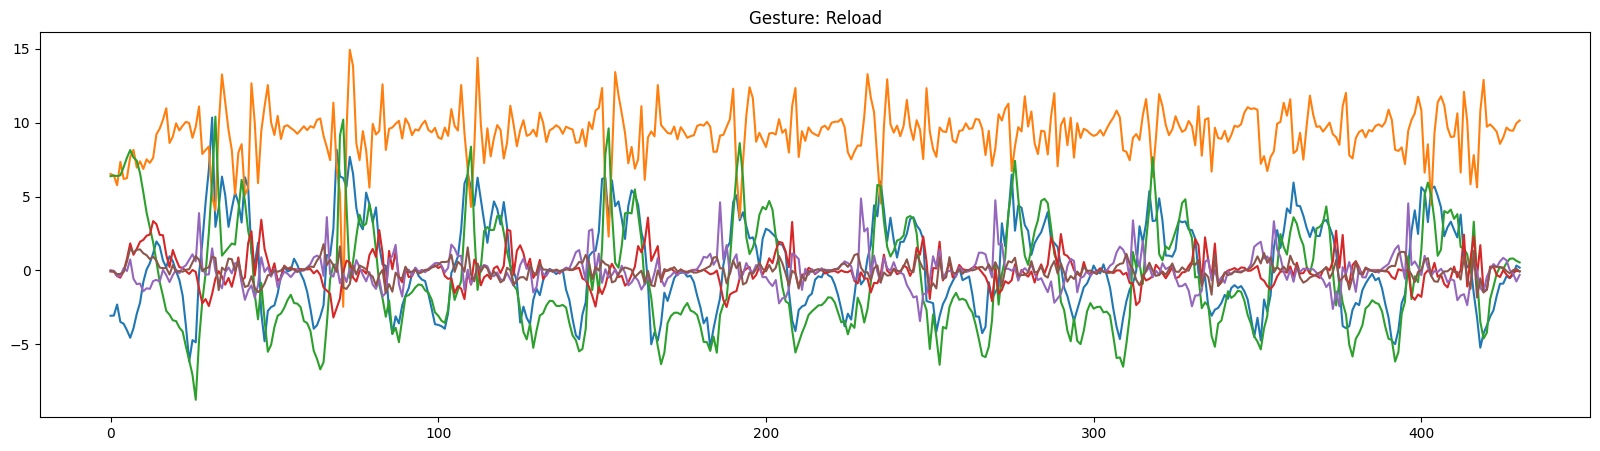

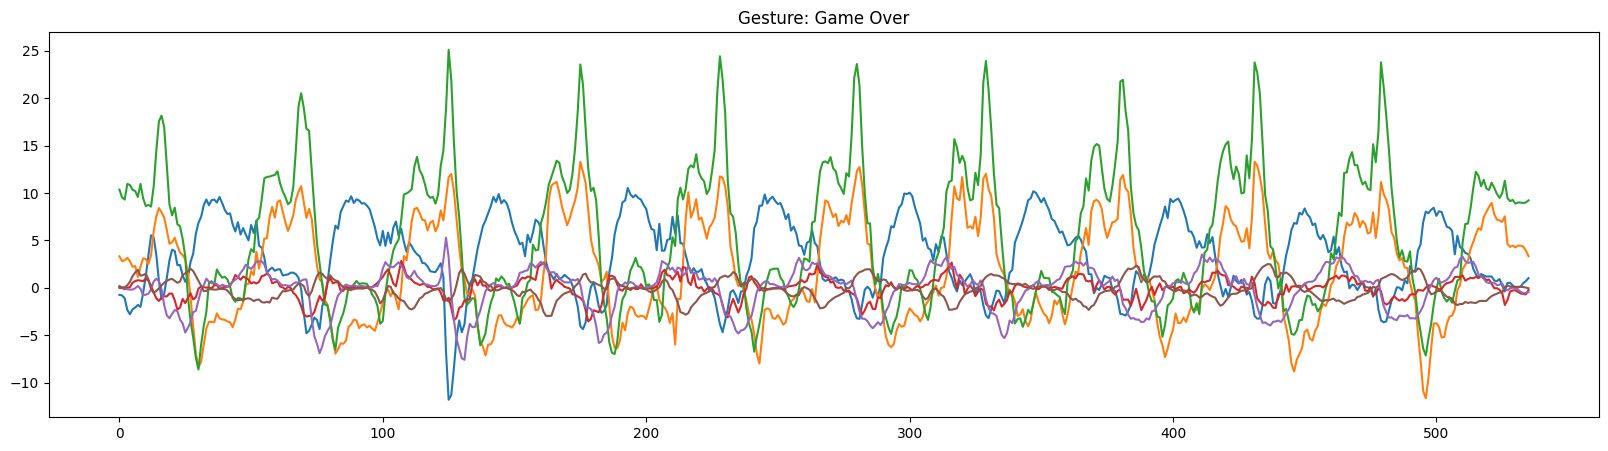

In [3]:
plot_graph(grenade, 'Grenade')
plot_graph(spiderman, 'Spiderman')
plot_graph(doctor_strange, 'Doctor Strange')
plot_graph(captain_marvel, 'Captain Marvel')
plot_graph(thor, 'Thor')
plot_graph(wakanda, 'Wakanda')
plot_graph(shield, 'Shield')
plot_graph(reload_df, 'Reload')
plot_graph(game_over_df, 'Game Over')

<h2> Cleaning the data </h2>

By observation, the data has some startup and ending delay, let's remove the first 10 % and last 10 %  of each dataframe, without modifying the original data

In [4]:
def return_clean_data(df):
    # remove first and last 10 % 
    return df.iloc[int(len(df)*0.1):int(len(df)*0.9)]

grenade = return_clean_data(grenade)
spiderman = return_clean_data(spiderman)
doctor_strange = return_clean_data(doctor_strange)
captain_marvel = return_clean_data(captain_marvel)
thor = return_clean_data(thor)
wakanda = return_clean_data(wakanda)
shield = return_clean_data(shield)
reload_df = return_clean_data(reload_df)
game_over_df = return_clean_data(game_over_df)


Running the same code, let's look at the graphs again

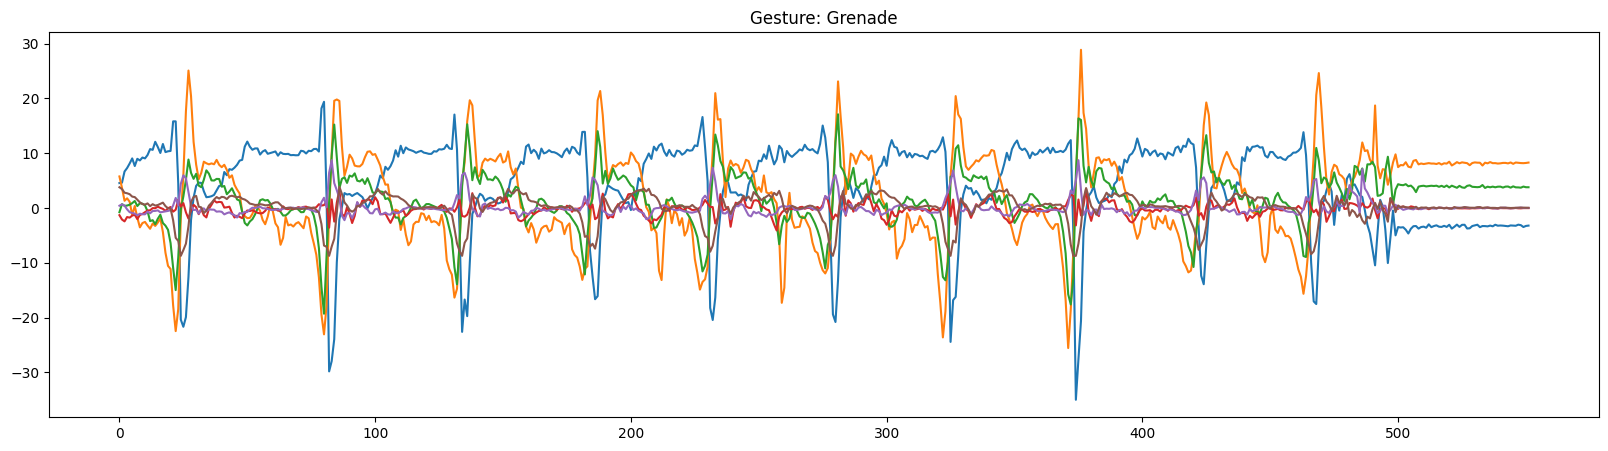

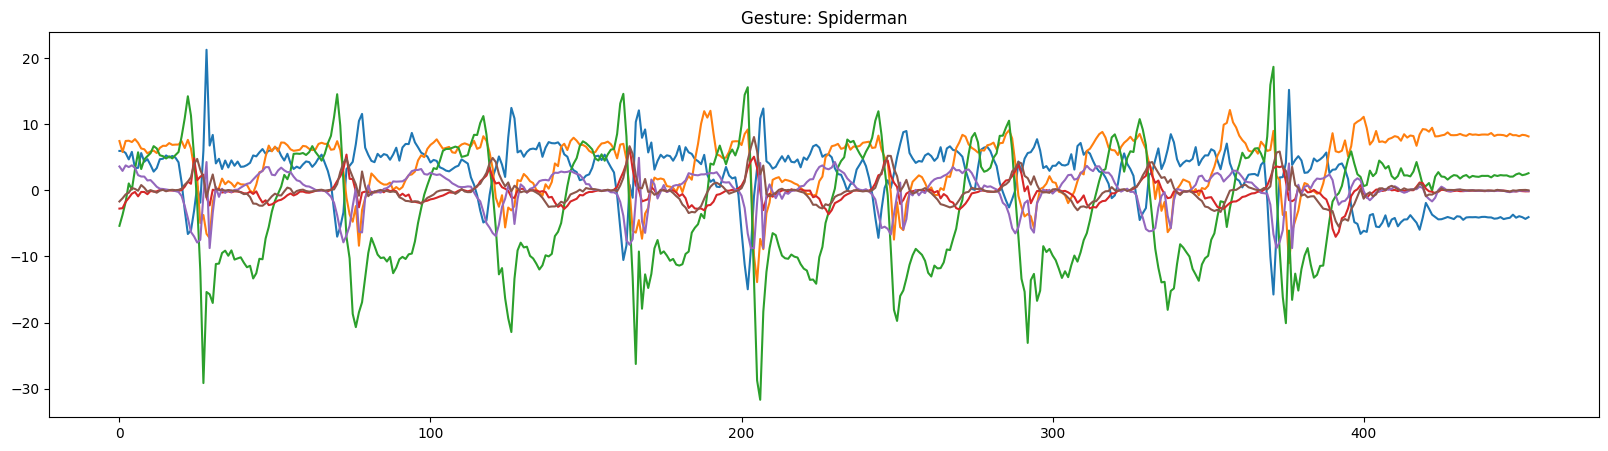

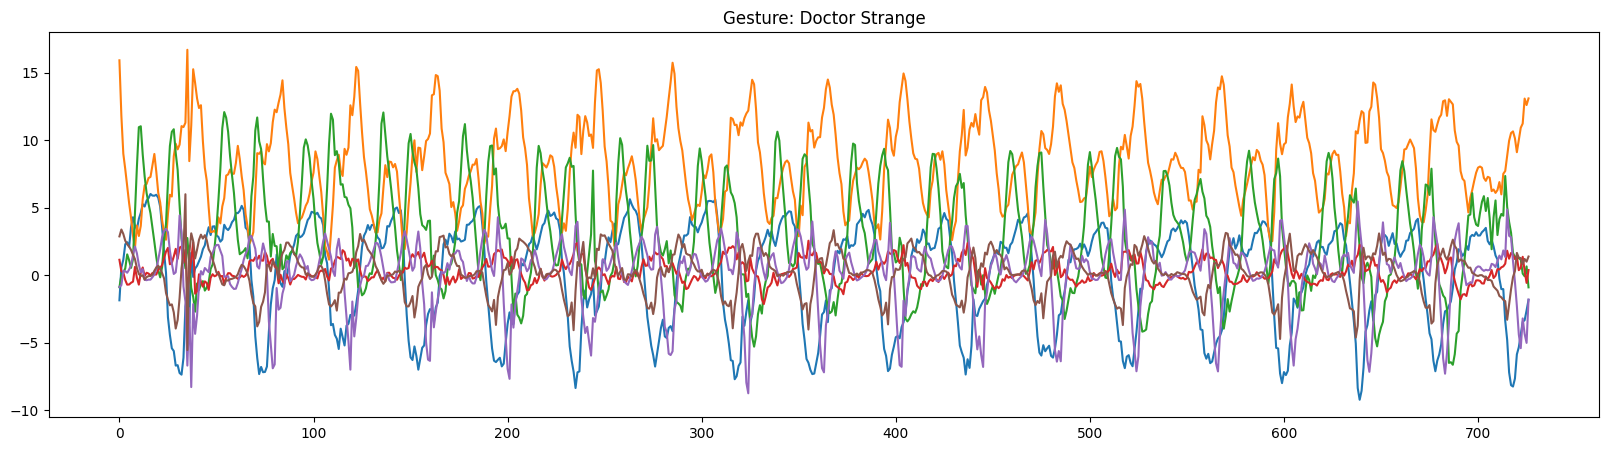

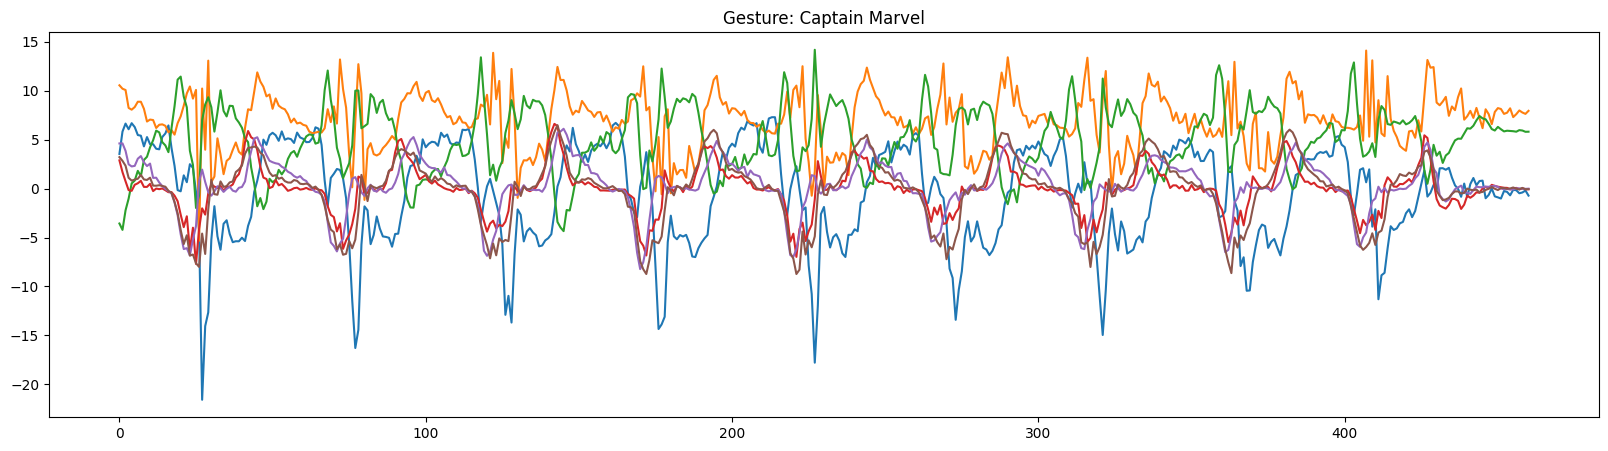

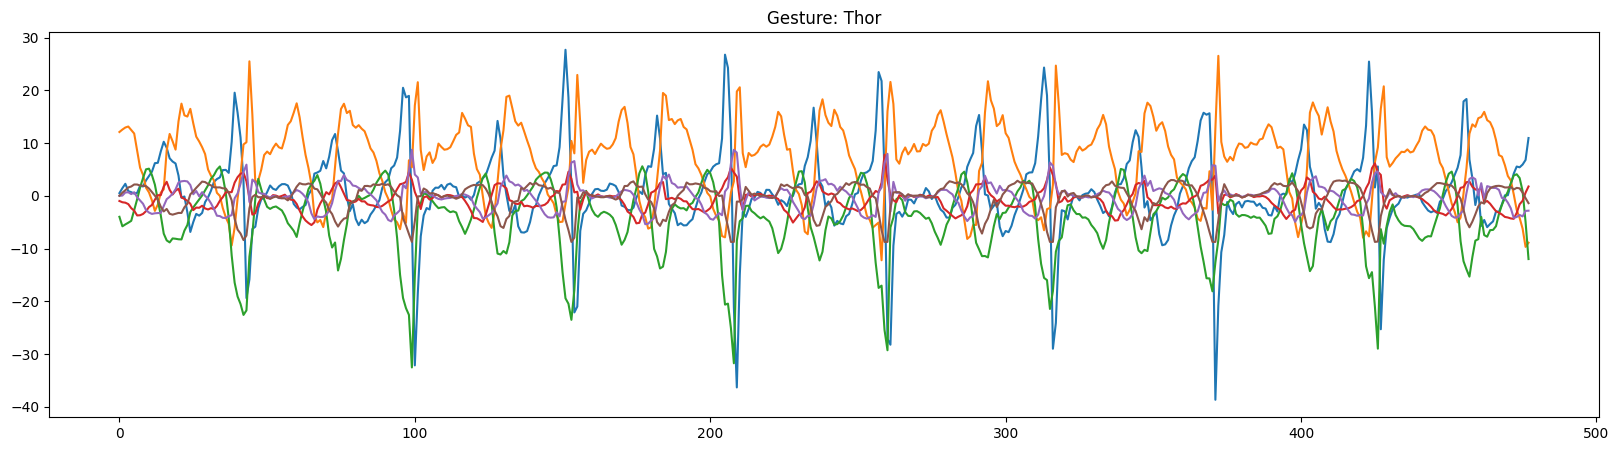

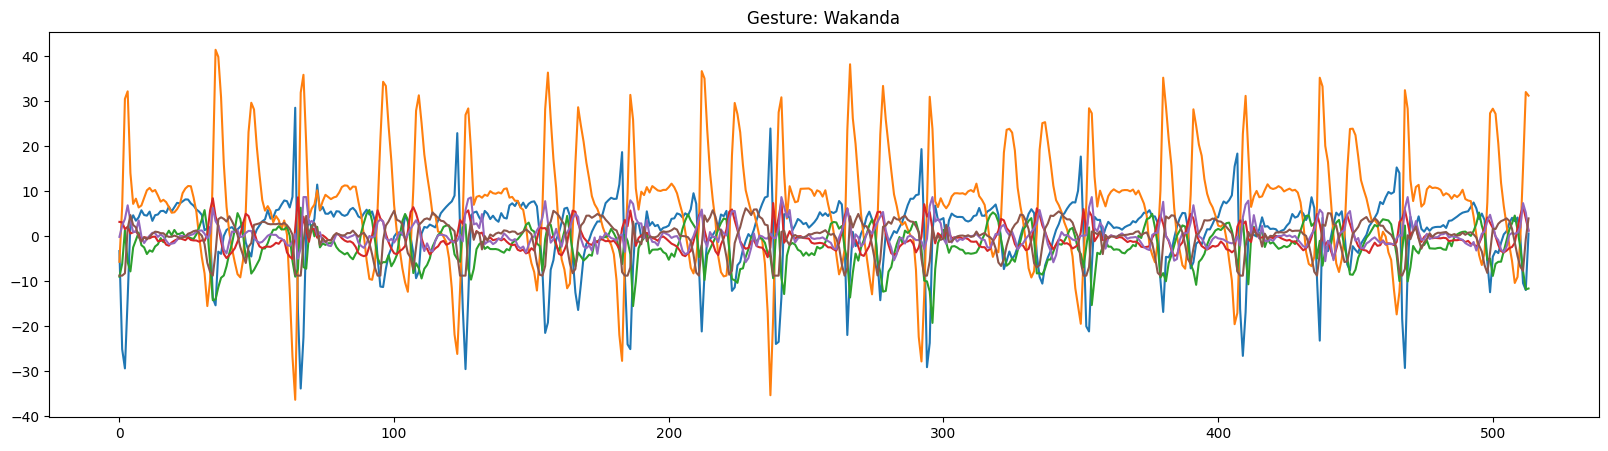

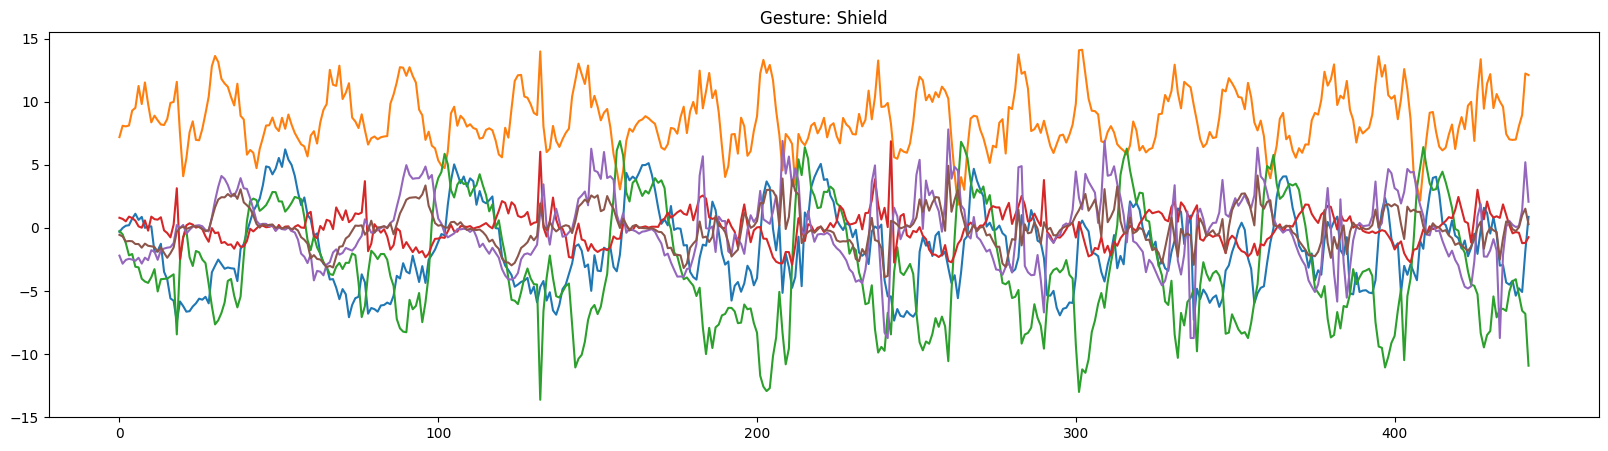

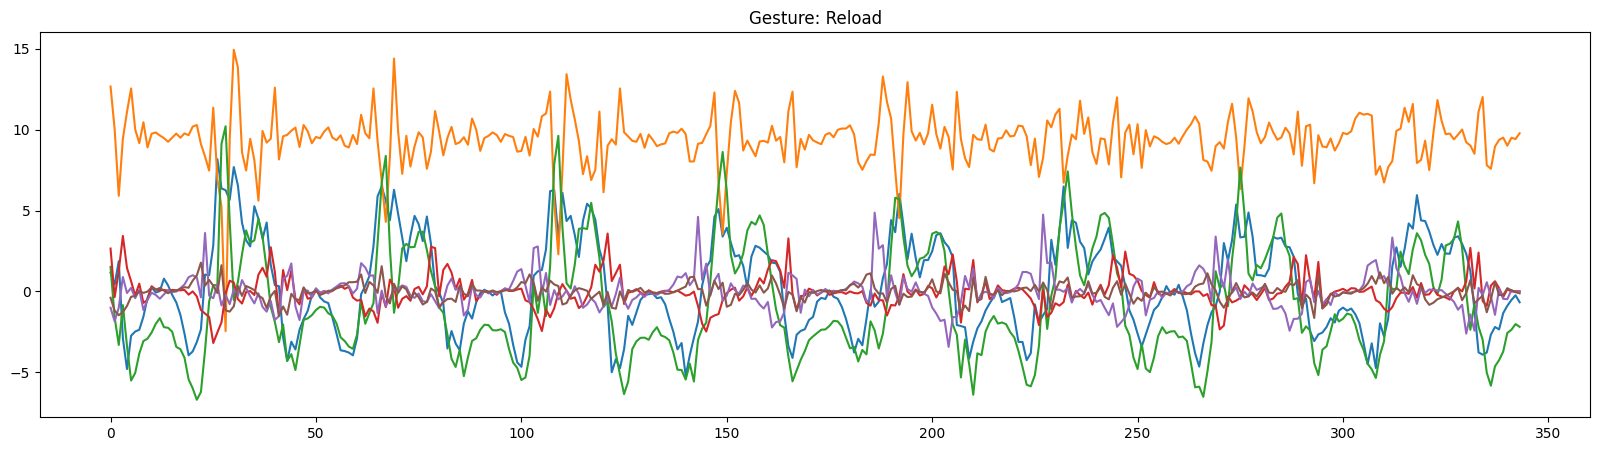

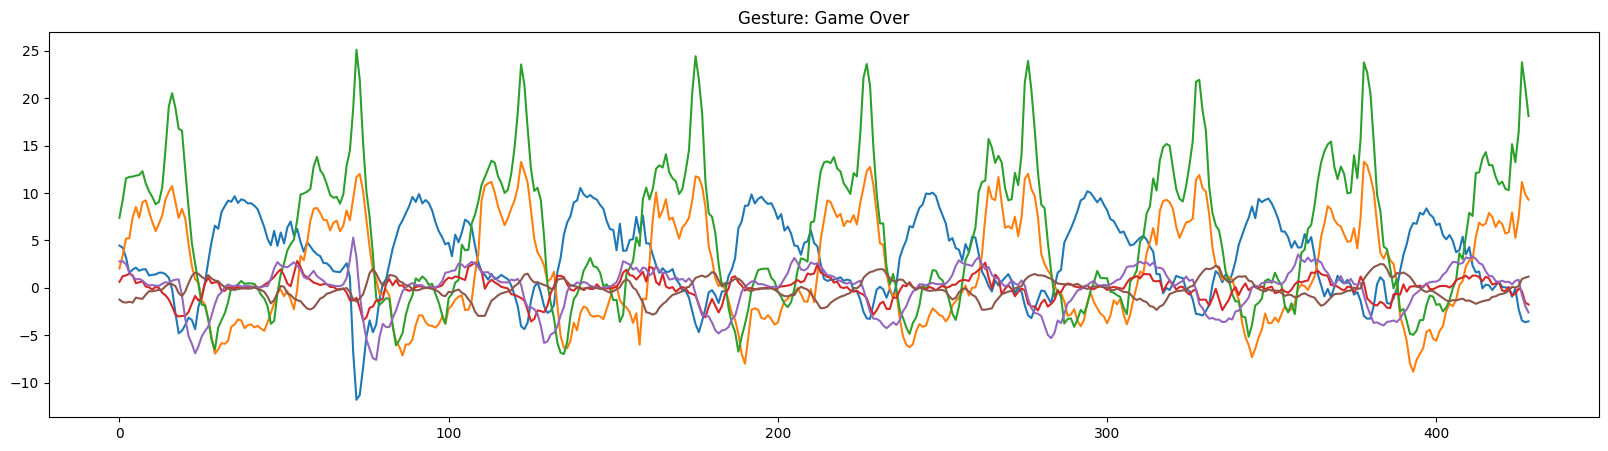

In [5]:
plot_graph(grenade, 'Grenade')
plot_graph(spiderman, 'Spiderman')
plot_graph(doctor_strange, 'Doctor Strange')
plot_graph(captain_marvel, 'Captain Marvel')
plot_graph(thor, 'Thor')
plot_graph(wakanda, 'Wakanda')
plot_graph(shield, 'Shield')
plot_graph(reload_df, 'Reload')
plot_graph(game_over_df, 'Game Over')

<h1> Window Selection </h1>

Now that we have the data of the actions, we aim to find a time window of $\alpha$ frames(in terms of how many sampling frames have been used), in order to split the data into [data per $\alpha$ frames] as the $X$ and [gesture] as the $y$ for our classification task.

The strategy here is to find our the number of frames taken by each action, and use the longest frame as an estimate of the action. Another idea, which is using the greatest common denominator (GCD) of the actions and training the model with individual GCD samples of each action, is slightly more complicated and left for future exploration

Grenade:

![](md-images/image-1.png)


Spiderman:

![](md-images/image-2.png)

Doctor Strange:

![](md-images/image-3.png)

Captain Marvel:

![](md-images/image-4.png)

Thor:

![](md-images/image-5.png)

Wakanda:

![](md-images/image-6.png)

Shield:

![](md-images/image-7.png)

Reload:

![](md-images/image-8.png)



<h2> Frame calculation </h2>

After eye-balling the data, we get the following measurements:

|Action| Frame Count | Periods | Frame / Period|
|---|---|---| ---|
|Grenade|460|10| 46|
|Spiderman|370|8| 46.25|
|Doctor Strange|700|8.5| 82.35|
|Captain Marvel|400|8| 50|
|Thor|360|7| 51.43| 
|Wakanda|500|9| 55.56|
|Shield|400|8| 50|
|Reload|300|7| 42.86|

With these values, it's clear that the suitable value to use is roughly 50 frames to capture an action, ignoring doctor strange's weird frame count for now

<h2> Generating training data </h2>

First, we must label the dataframes with their corresponding labels.
<h3> Generating labels </h3>

We will use the following mapping:

|Action|Label|
|---|---|
| Grenade | 0 |
| Spiderman | 1 |
| Doctor Strange | 2 |
| Captain Marvel | 3 |
| Thor | 4 |
| Wakanda | 5 |
| Shield | 6 |
| Reload | 7 |
| Game over | 8 |

Following which, we will drop the index due to the dropping of sampling frames earlier


In [6]:
def append_label(df, label):
    df['Label'] = label
    return df

grenade = append_label(grenade, '0')
spiderman = append_label(spiderman, '1')
doctor_strange = append_label(doctor_strange, '2')
captain_marvel = append_label(captain_marvel, '3')
thor = append_label(thor, '4')
wakanda = append_label(wakanda, '5')
shield = append_label(shield, '6')
reload_df = append_label(reload_df, '7')
game_over_df = append_label(game_over_df, '8')

# reset index of all dataframes
grenade.reset_index(drop=True, inplace=True)
spiderman.reset_index(drop=True, inplace=True)
doctor_strange.reset_index(drop=True, inplace=True)
captain_marvel.reset_index(drop=True, inplace=True)
thor.reset_index(drop=True, inplace=True)
wakanda.reset_index(drop=True, inplace=True)
shield.reset_index(drop=True, inplace=True)
reload_df.reset_index(drop=True, inplace=True)
game_over_df.reset_index(drop=True, inplace=True)

<h3> Generating sequence data </h3>

In [7]:
# function to reshape features into seq_array: (samples, time steps, features)
def gen_sequence(df, seq_length, seq_cols):
    data_array = df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]
        
sequence_cols = ['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z']

seq_len = 50

# generator for the sequences
seq_gen_grenade = (list(gen_sequence(grenade, seq_len, sequence_cols)))
seq_gen_spiderman = (list(gen_sequence(spiderman, seq_len, sequence_cols)))
seq_gen_doctor_strange = (list(gen_sequence(doctor_strange, seq_len, sequence_cols)))
seq_gen_captain_marvel = (list(gen_sequence(captain_marvel, seq_len, sequence_cols)))
seq_gen_thor = (list(gen_sequence(thor, seq_len, sequence_cols)))
seq_gen_wakanda = (list(gen_sequence(wakanda, seq_len, sequence_cols)))
seq_gen_shield = (list(gen_sequence(shield, seq_len, sequence_cols)))
seq_gen_reload = (list(gen_sequence(reload_df, seq_len, sequence_cols)))
seq_gen_game_over = (list(gen_sequence(game_over_df, seq_len, sequence_cols)))

# convert to numpy array
seq_arr_grenade = np.stack(list(seq_gen_grenade)).astype(np.float32)
seq_arr_spiderman = np.stack(list(seq_gen_spiderman)).astype(np.float32)
seq_arr_doctor_strange = np.stack(list(seq_gen_doctor_strange)).astype(np.float32)
seq_arr_captain_marvel = np.stack(list(seq_gen_captain_marvel)).astype(np.float32)
seq_arr_thor = np.stack(list(seq_gen_thor)).astype(np.float32)
seq_arr_wakanda = np.stack(list(seq_gen_wakanda)).astype(np.float32)
seq_arr_shield = np.stack(list(seq_gen_shield)).astype(np.float32)
seq_arr_reload = np.stack(list(seq_gen_reload)).astype(np.float32)
seq_arr_game_over = np.stack(list(seq_gen_game_over)).astype(np.float32)



In [8]:
def gen_labels(df, seq_len, label):
    data_array = df[label].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_len), range(seq_len, num_elements)):
        yield data_array[stop, :]
        
label_cols = ['Label']
label_arr_grenade = np.stack(list(gen_labels(grenade, seq_len, label_cols))).astype(np.float32)
label_arr_spiderman = np.stack(list(gen_labels(spiderman, seq_len, label_cols))).astype(np.float32)
label_arr_doctor_strange = np.stack(list(gen_labels(doctor_strange, seq_len, label_cols))).astype(np.float32)
label_arr_captain_marvel = np.stack(list(gen_labels(captain_marvel, seq_len, label_cols))).astype(np.float32)
label_arr_thor = np.stack(list(gen_labels(thor, seq_len, label_cols))).astype(np.float32)
label_arr_wakanda = np.stack(list(gen_labels(wakanda, seq_len, label_cols))).astype(np.float32)
label_arr_shield = np.stack(list(gen_labels(shield, seq_len, label_cols))).astype(np.float32)
label_arr_reload = np.stack(list(gen_labels(reload_df, seq_len, label_cols))).astype(np.float32)
label_arr_game_over = np.stack(list(gen_labels(game_over_df, seq_len, label_cols))).astype(np.float32)


<h2> Splitting into train, test and validation set </h2>

We will use the following splits for the training data (90, 10) as this example uses a limited dataset

In [9]:
def train_test_split(df):
    # 90% train, 10% test
    length = len(df)
    # split randomly
    train_index = np.random.choice(length, round(length*0.9), replace=False)
    test_index = np.array(list(set(range(length)) - set(train_index)))
    train = df[train_index]
    test = df[test_index]
    
    return train, test

X_train_grenade, X_test_grenade = train_test_split(seq_arr_grenade)
X_train_spiderman, X_test_spiderman = train_test_split(seq_arr_spiderman)
X_train_doctor_strange, X_test_doctor_strange = train_test_split(seq_arr_doctor_strange)
X_train_captain_marvel, X_test_captain_marvel = train_test_split(seq_arr_captain_marvel)
X_train_thor, X_test_thor = train_test_split(seq_arr_thor)
X_train_wakanda, X_test_wakanda = train_test_split(seq_arr_wakanda)
X_train_shield, X_test_shield = train_test_split(seq_arr_shield)
X_train_reload, X_test_reload = train_test_split(seq_arr_reload)
X_train_game_over, X_test_game_over = train_test_split(seq_arr_game_over)

y_train_grenade, y_test_grenade = train_test_split(label_arr_grenade)
y_train_spiderman, y_test_spiderman = train_test_split(label_arr_spiderman)
y_train_doctor_strange, y_test_doctor_strange = train_test_split(label_arr_doctor_strange)
y_train_captain_marvel, y_test_captain_marvel = train_test_split(label_arr_captain_marvel)
y_train_thor, y_test_thor = train_test_split(label_arr_thor)
y_train_wakanda, y_test_wakanda = train_test_split(label_arr_wakanda)
y_train_shield, y_test_shield = train_test_split(label_arr_shield)
y_train_reload, y_test_reload = train_test_split(label_arr_reload)
y_train_game_over, y_test_game_over = train_test_split(label_arr_game_over)


<h2> Merging the actions </h2>

In [10]:
X_train = np.concatenate((X_train_grenade, X_train_spiderman, X_train_doctor_strange, X_train_captain_marvel, X_train_thor, X_train_wakanda, X_train_shield, X_train_reload, X_train_game_over))
X_test  = np.concatenate((X_test_grenade, X_test_spiderman, X_test_doctor_strange, X_test_captain_marvel, X_test_thor, X_test_wakanda, X_test_shield, X_test_reload, X_test_game_over))

y_train = np.concatenate((y_train_grenade, y_train_spiderman, y_train_doctor_strange, y_train_captain_marvel, y_train_thor, y_train_wakanda, y_train_shield, y_train_reload, y_train_game_over))
y_test  = np.concatenate((y_test_grenade, y_test_spiderman, y_test_doctor_strange, y_test_captain_marvel, y_test_thor, y_test_wakanda, y_test_shield, y_test_reload, y_test_game_over))

assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

<h1> MLP Model </h1>

Now, we can finally train the model!

<h2> Model definition </h2>

In [11]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(3558, 50, 6)
(394, 50, 6)
(3558, 1)
(394, 1)


In [12]:
#import MLPClassifier
from sklearn.neural_network import MLPClassifier

# create an instance of the model
mlp = MLPClassifier(hidden_layer_sizes=(64, 40, 20), activation='relu', solver='adam', max_iter=100)

<h2> Model fitting </h2>

We will now fit the model to training data.

We will use the MLP Classifier from sklearn, as the model optimizes the log-loss function using LBFGS or stochastic gradient descent.

In [23]:
# train the model, we reshape the data into 2D array of size (n_samples, n_features). 
# In this case, we have 50 time steps and 6 features, so we have 300 features
# we also reshape the labels into 1D array

# use grid search to find the best parameters
from sklearn.model_selection import GridSearchCV

# create a dictionary of parameters
param = {'hidden_layer_sizes': [(64, 40, 20), (64, 40, 20, 10), (64, 40, 20, 10, 5)]}

# create instance of grid search, commented out as done already
grid_search = GridSearchCV(mlp, param, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train.reshape(-1, 300), y_train.reshape(-1,))

/home/nigel/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(64, 40, 20),
                                     max_iter=100),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(64, 40, 20), (64, 40, 20, 10),
                                                (64, 40, 20, 10, 5)]},
             scoring='accuracy')

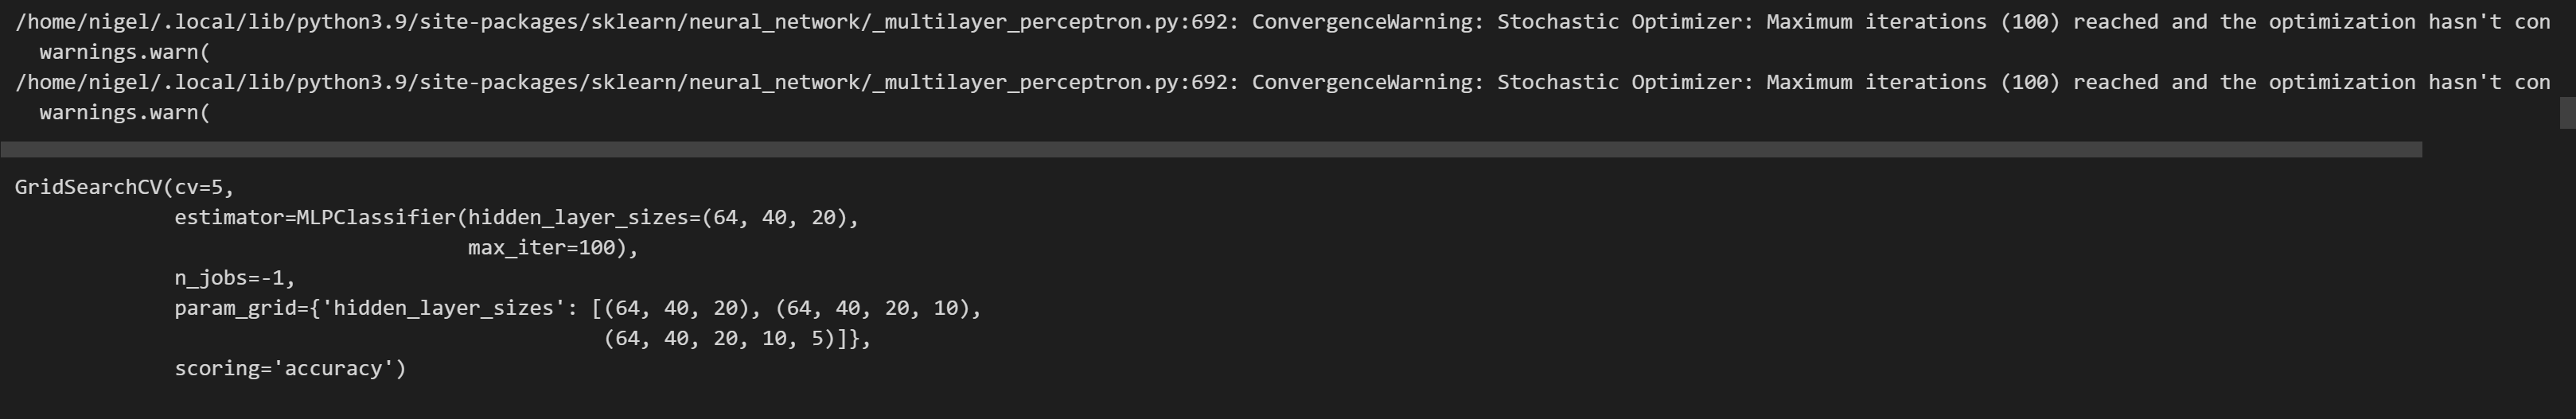

<h2> Model Evaluation </h2>

We can then evaluate the model


In [24]:
print('grid search found the best params: ', grid_search.best_params_)
print('which has the score of % : ', grid_search.best_score_)

mlp = grid_search.best_estimator_


grid search found the best params:  {'hidden_layer_sizes': (64, 40, 20, 10)}
which has the score of % :  0.9988764044943821


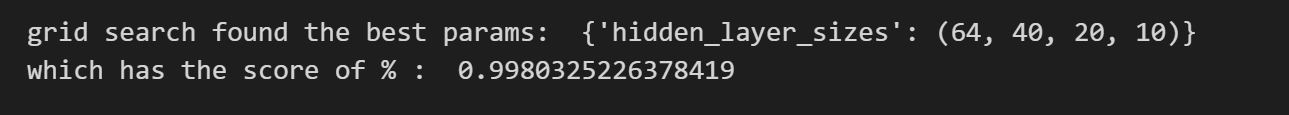

In [25]:
#print output and shape of the model
print(mlp)

#print activation functions used
print(mlp.out_activation_)

#visualise layers of the model
print(mlp.n_layers_)
print('layer 1', mlp.coefs_[0].shape)
print('number of parameters', mlp.coefs_[0].shape[0]*mlp.coefs_[0].shape[1])
print('layer 2', mlp.coefs_[1].shape)
print('number of parameters', mlp.coefs_[1].shape[0]*mlp.coefs_[1].shape[1])
print('layer 3', mlp.coefs_[2].shape)
print('number of parameters', mlp.coefs_[2].shape[0]*mlp.coefs_[2].shape[1])
print('layer 4', mlp.coefs_[3].shape)
print('number of parameters', mlp.coefs_[3].shape[0]*mlp.coefs_[3].shape[1])

MLPClassifier(hidden_layer_sizes=(64, 40, 20, 10), max_iter=100)
softmax
6
layer 1 (300, 64)
number of parameters 19200
layer 2 (64, 40)
number of parameters 2560
layer 3 (40, 20)
number of parameters 800
layer 4 (20, 10)
number of parameters 200


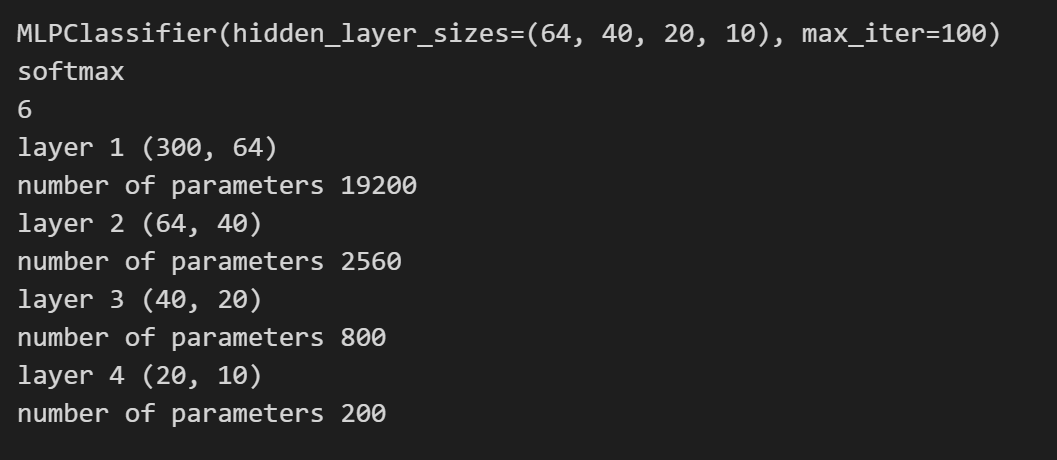

<h2> Exporting to FPGA </h2>

We can simply derive the weights and biases of the model and store them in a text file

In [26]:
#get weights and bias of model and store in a matrix
weights = []
biases = []

for i in range(len(mlp.coefs_)):
    weights.append(mlp.coefs_[i])
    biases.append(mlp.intercepts_[i])
    
print('The shape of weights matrix is:', [i.shape for i in weights])
print('This represents a tuples of (n_neurons_in_previous_layer, n_neurons_in_current_layer)')
print('For instance, the first layer has 300 features, and the second layer has 64 neurons, so the shape of the first weight matrix is (300, 64)')
print('A sample value of w1 is', weights[0][0][0])
print('The shape of bias matrix is', [i.shape for i in biases])
print('This represents a tuples of (n_neurons_in_current_layer,)')

The shape of weights matrix is: [(300, 64), (64, 40), (40, 20), (20, 10), (10, 9)]
This represents a tuples of (n_neurons_in_previous_layer, n_neurons_in_current_layer)
For instance, the first layer has 300 features, and the second layer has 64 neurons, so the shape of the first weight matrix is (300, 64)
A sample value of w1 is 0.14882532
The shape of bias matrix is [(64,), (40,), (20,), (10,), (9,)]
This represents a tuples of (n_neurons_in_current_layer,)


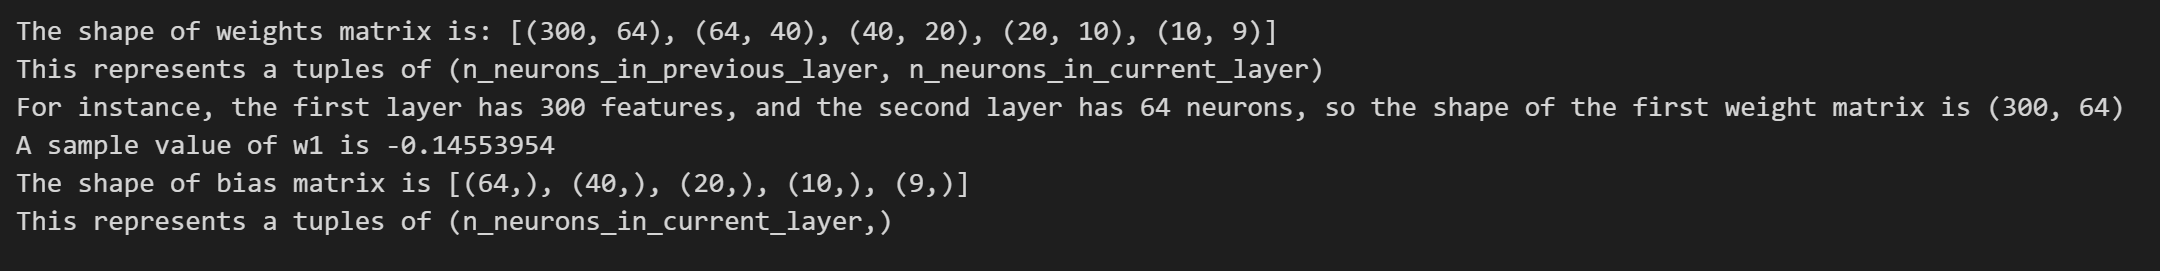

<h3> Taking the transpose of the weight matrix </h3>

We have to store the weight matrix in a format that can be used in the C code.

Similarly, we refer to the way matrix multiplication is carried out ![Alt text](image-9.png) (Credit: CS4248 lecture slides)


In [27]:
weights_l1 = np.array(weights[0])
print(weights_l1.shape)
weights_l2 = np.array(weights[1])
print(weights_l2.shape)
weights_l3 = np.array(weights[2])
print(weights_l3.shape)
weights_l4 = np.array(weights[3])
print(weights_l4.shape)
weights_l5 = np.array(weights[4])
print(weights_l5.shape)



(300, 64)
(64, 40)
(40, 20)
(20, 10)
(10, 9)


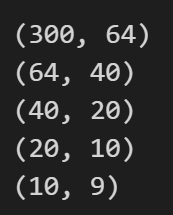

In [28]:
#write weights and biases to a file
import os
# use relative path to avoid conflicts
folder_name = 'model_param'
    
os.chdir(folder_name)

l1_n = l1_b = weights_l1.shape[0]
l2_n = l2_b = weights_l2.shape[0]
l3_n = l3_b = weights_l3.shape[0]
l4_n = l4_b = weights_l4.shape[0]
l5_n = l5_b = weights_l5.shape[0]
out_n = weights_l5.shape[1]

with open('w.h', 'w+') as f:
    # constants
    f.write("#ifndef W_H\n#define W_H\n\n")
    f.write("#define in_n %s\n" % str(l1_n)) #300
    f.write("#define l1_n %s\n" % str(l2_n)) #64
    f.write("#define l2_n %s\n" % str(l3_n)) #40
    f.write("#define l3_n %s\n" % str(l4_n)) #20
    f.write("#define l4_n %s\n\n" % str(l5_n))   #10
    f.write("#define out_n %s\n\n" % str(out_n)) #9
    
    # declare arrays
    f.write("float w1[in_n][l1_n] = {")
    #write with transposed matrix
    for i in range(l1_n):
        f.write("{")
        for j in range(l2_n):
            f.write(str(weights_l1[i][j]))
            if j != l2_n-1:
                f.write(", ")
        f.write("}")
        if i != l1_n-1:
            f.write(",\n")
    f.write("};\n\n")
    
    f.write("float w2[l1_n][l2_n] = {")
    for i in range(l2_n):
        f.write("{")
        for j in range(l3_n):
            f.write(str(weights_l2[i][j]))
            if j != l3_n-1:
                f.write(", ")
        f.write("}")
        if i != l2_n-1:
            f.write(",\n")
    f.write("};\n\n")
    
    f.write("float w3[l2_n][l3_n] = {")
    for i in range(l3_n):
        f.write("{")
        for j in range(l4_n):
            f.write(str(weights_l3[i][j]))
            if j != l4_n-1:
                f.write(", ")
        f.write("}")
        if i != l3_n-1:
            f.write(",\n")
    f.write("};\n\n")
    
    f.write("float w4[l3_n][l4_n] = {")
    for i in range(l4_n):
        f.write("{")
        for j in range(l5_n):
            f.write(str(weights_l4[i][j]))
            if j != l5_n-1:
                f.write(", ")
        f.write("}")
        if i != l4_n-1:
            f.write(",\n")
    f.write("};\n\n")
    
    f.write("float w5[l4_n][out_n] = {")
    for i in range(l5_n):
        f.write("{")
        for j in range(out_n):
            f.write(str(weights_l5[i][j]))
            if j != out_n-1:
                f.write(", ")
        f.write("}")
        if i != l5_n-1:
            f.write(",\n")
    f.write("};\n\n")
    
    f.write("float b1[l1_n] = {")
    for i in range(len(biases[0])):
        f.write(str(biases[0][i]))
        if i != len(biases[0])-1:
            f.write(", ")
    f.write("};\n\n")
    
    f.write("float b2[l2_n] = {")
    for i in range(len(biases[1])):
        f.write(str(biases[1][i]))
        if i != len(biases[1])-1:
            f.write(", ") 
    f.write("};\n\n")
    
    f.write("float b3[l3_n] = {")
    for i in range(len(biases[2])):
        f.write(str(biases[2][i]))
        if i != len(biases[2])-1:
            f.write(", ")    
    f.write("};\n\n")
    
    f.write("float b4[l4_n] = {")
    for i in range(len(biases[3])):
        f.write(str(biases[3][i]))
        if i != len(biases[3])-1:
            f.write(", ")  
    f.write("};\n\n")
    
    f.write("float b5[out_n] = {")
    for i in range(len(biases[4])):
        f.write(str(biases[4][i]))
        if i != len(biases[4])-1:
            f.write(", ")
    f.write("};\n\n")
    
    f.write("#endif")

os.chdir('..')  # prevent errors when running the script multiple times

<h2> Creating test codes for FPGA </h2>

To simulate the tests on the FPGA, we will extract some sample data and make predictions!

In [29]:
def predict():
    indexes = [0, 50, 100, 150, 200, 250, 300, 350] 
    for i in indexes:
        print('Prediction on ' + str(i) + ' index: ', mlp.predict(X_test[i].reshape(-1, 300)) , 'Actual label: ', y_test[i])
        #print probablities
        print('Probablities: ', mlp.predict_proba(X_test[i].reshape(-1, 300)))
predict()



Prediction on 0 index:  [0.] Actual label:  [0.]
Probablities:  [[9.9999249e-01 2.2564270e-06 4.1743613e-14 3.9657275e-06 9.1927285e-07
  3.3251496e-07 1.4243192e-17 1.3382651e-08 1.8334940e-09]]
Prediction on 50 index:  [1.] Actual label:  [1.]
Probablities:  [[7.8705480e-06 9.8737305e-01 3.3155164e-08 3.3547281e-07 7.8343078e-03
  1.8035787e-07 1.2619091e-03 1.0699271e-07 3.5222021e-03]]
Prediction on 100 index:  [2.] Actual label:  [2.]
Probablities:  [[1.0657374e-09 3.0733164e-19 9.9996805e-01 2.5139906e-08 6.6576128e-17
  3.1917309e-05 4.3570644e-11 3.9970306e-08 1.1831218e-18]]
Prediction on 150 index:  [2.] Actual label:  [2.]
Probablities:  [[1.41816572e-10 8.23177188e-20 9.99971747e-01 8.89479601e-09
  1.50832110e-16 2.81793873e-05 7.98726987e-11 1.06770386e-07
  1.73378856e-18]]
Prediction on 200 index:  [4.] Actual label:  [4.]
Probablities:  [[1.0031034e-07 7.1356806e-04 4.4386603e-13 9.1216946e-16 9.9928397e-01
  4.6706193e-14 2.0373336e-06 2.9492580e-07 4.1687931e-11]]
Pr

In [30]:
#simply extract the index of test data and values and write to a file

os.chdir(folder_name)
with open('test_rows.txt', 'w') as f:
    for i in [0, 50, 100, 150, 200, 250, 300, 350]:
        # print flattened array
        f.write(str(X_test[i].reshape(-1, 300).tolist()[0]))
        f.write('\n')
        
print("The expected labels are", y_test[[0, 50, 100, 150, 200, 250, 300, 350]])

os.chdir('..')  # prevent errors when running the script multiple times

The expected labels are [[0.]
 [1.]
 [2.]
 [2.]
 [4.]
 [5.]
 [6.]
 [7.]]


<h2> Further improvements </h2>

The feature engineering bit can be explored further to improve the accuracy

More training data can be gathered to improve the accuracy

We have to decide on a logout move

Writing test data to a text file

In [31]:
# save all test data to a file
os.chdir(folder_name)
with open('all_test_rows.txt', 'w') as f:
    for i in range(len(X_test)):
        # print flattened array
        f.write(str(X_test[i].reshape(-1, 300).tolist()[0]))
        f.write('\n')

os.chdir('..')  # prevent errors when running the script multiple times

In [32]:
# save all expected labels to a file
os.chdir(folder_name)
with open('all_test_labels.txt', 'w') as f:
    for i in range(len(y_test)):
        f.write(str(y_test[i]))
        f.write('\n')

os.chdir('..')  # prevent errors when running the script multiple times

In [36]:
# Now we can run a test on the accuracy given by the model
test_rows = pd.read_csv('model_param/all_test_rows.txt')

# clean up the data by only using the digits ([] was left as printing format)
import regex
test_rows = test_rows.replace(regex=r'[^0-9.-]', value='')

# set column names from t1 to t300
test_rows.columns = ['t' + str(i) for i in range(1, 301)]
# add label column
test_rows['label'] = pd.read_csv('model_param/all_test_labels.txt')
# clean up the label column
test_rows['label'] = test_rows['label'].replace(regex=r'[^0-9.-]', value='')

# convert all types to float32
test_rows = test_rows.astype('float32')

test_rows.head()

t1     t2    t3    t4    t5    t6     t7     t8    t9   t10  ...  t292  \
0   9.21  -2.74  0.79 -1.08 -1.14  0.72   9.05  -2.54  0.47 -0.76  ... -0.52   
1  -1.08  18.73  5.07  2.71 -0.21  2.49   0.12  12.04  7.43  0.10  ... -2.04   
2  10.04  -1.90 -1.23  0.02 -0.79  0.77  11.68  -4.39 -2.74 -0.16  ...  0.31   
3   1.67   8.77  5.05  0.35 -0.10  1.03   1.13   8.49  5.74  0.47  ... -0.06   
4  10.22  -3.51  0.99 -0.73  0.16  0.55  10.51  -3.85  1.04 -0.33  ... -0.28   

   t293  t294   t295       t296   t297  t298  t299  t300  label  
0 -0.07  0.49   9.89  -1.550000   1.46  0.10 -0.18  0.52    0.0  
1  5.13 -7.42 -16.08  19.639999  14.02 -1.68  4.15 -5.16    0.0  
2 -0.14  0.12   9.84  -1.650000  -1.36 -0.16 -0.05 -0.03    0.0  
3 -0.18 -0.02   3.17   8.020000   5.14  0.72  0.40  0.45    0.0  
4  0.16  0.53   9.12  -4.550000   2.77 -0.15 -0.10  0.34    0.0  

[5 rows x 301 columns]

## Inference and testing from file 

Running the test on FPGA

In [37]:
def infer(dma, input_data, input_buffer, output_buffer):
    """
    returns an inference given input data
    
    @ param input_data: a list of 300 floats, representing 50 samples of [Acc_x, Acc_y, Acc_z, Gyro_x, Gyro_y, Gyro_z]
    @ param input_buffer: allocated memory for input data
    @ param output_buffer: allocated memory for output data
    """
    for i, x in enumerate(input_data):
        input_buffer[i] = x
    # call predict
    dma.sendchannel.transfer(input_buffer) 
    dma.recvchannel.transfer(output_buffer)
    
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    
    return int(output_buffer)


def test(dma, test_data, input_buffer, output_buffer):
    # returns accuracy given test data
    total_count = 0
    
    # for each row in dataframe withou label column
    for i in range(len(test_data)):
        # get label
        label = test_data.iloc[i]['label']
        # get data
        data = test_data.iloc[i][:-1]
        #package into array
        data = np.array(data)
        # get prediction
        prediction = infer(dma, data, input_buffer, output_buffer)
        # increment total_count if prediction is correct
        if prediction == label:
            total_count += 1
    # return accuracy
    return total_count / len(test_data)

    